<a href="https://colab.research.google.com/github/shirinlatifi/pe-project/blob/master/OilSG_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [66]:
#load dataset
# X: Input features
# y: Target values

df = pd.read_excel('oil SG.xlsx')

In [ ]:
df

In [68]:
df['P'] = df['P'].fillna(df['P'].mean())

In [69]:
df['T'] = df['T'].fillna(df['T'].mean())

In [70]:
df.dropna(inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       480 non-null    float64
 1   P       480 non-null    float64
 2   Sgo     480 non-null    float64
dtypes: float64(3)
memory usage: 15.0 KB


In [72]:
df.corr()['Sgo']

T     -0.483459
P     -0.093414
Sgo    1.000000
Name: Sgo, dtype: float64

<Axes: xlabel='P', ylabel='Sgo'>

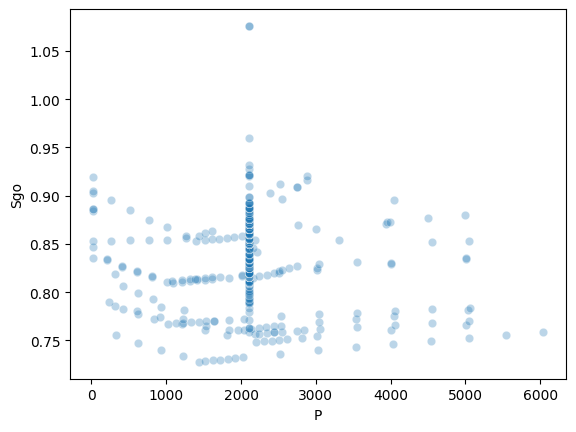

In [73]:
import seaborn as sns
sns.scatterplot(data=df, x='P', y='Sgo', alpha=0.3)

<Axes: xlabel='T', ylabel='Sgo'>

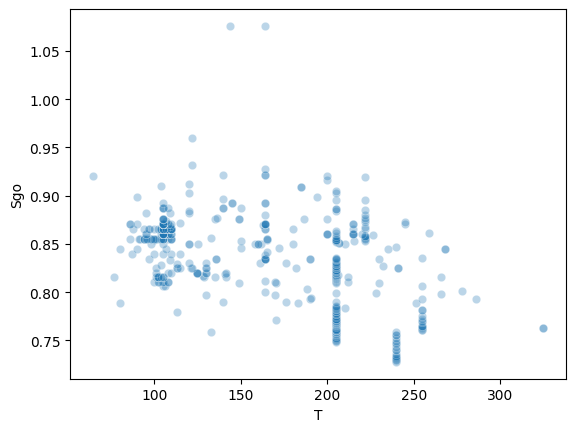

In [74]:
sns.scatterplot(data=df, x='T', y='Sgo', alpha=0.3)

In [75]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sgo', axis=1), df['Sgo'], test_size=0.2, random_state=42)

In [78]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
X_train_scaled.max() , X_train_scaled.min()

(4.9047722785157, -2.576875929699264)

In [80]:
X_test_scaled.max() , X_test_scaled.min()

(3.61404120399327, -2.576875929699264)

In [76]:
y_train.max() , y_train.min()

(1.0760456273764258, 0.7283597323014953)

In [77]:
y_test.max() , y_test.min()

(0.9593220338983051, 0.727671480424143)

In [ ]:
X_train_scaled

In [82]:
X_train_scaled.shape

(384, 2)

In [83]:
X_train_scaled.shape[0] , X_train_scaled.shape[1]

(384, 2)

In [86]:
# Build the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output neuron for regression
])

In [87]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [89]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=300, batch_size=64, validation_split=0.2)

Epoch 1/300
5/5 [==============================] - 0s 36ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 2/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 3/300
5/5 [==============================] - 0s 31ms/step - loss: 9.6447e-04 - val_loss: 0.0020
Epoch 4/300
5/5 [==============================] - 0s 21ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 5/300
5/5 [==============================] - 0s 10ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 6/300
5/5 [==============================] - 0s 11ms/step - loss: 9.7066e-04 - val_loss: 0.0020
Epoch 7/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 8/300
5/5 [==============================] - 0s 22ms/step - loss: 9.9465e-04 - val_loss: 0.0019
Epoch 9/300
5/5 [==============================] - 0s 15ms/step - loss: 9.8063e-04 - val_loss: 0.0019
Epoch 10/300
5/5 [==============================] - 0s 29ms/step - loss: 9.7234e-04 - val_loss: 0.0019

In [90]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print("Test loss:", loss)

3/3 [==============================] - 0s 7ms/step - loss: 0.0021
Test loss: 0.0021258697379380465


In [91]:
# Make predictions
predictions = model.predict(X_test_scaled)

3/3 [==============================] - 0s 2ms/step


In [ ]:
predictions

# accuracy

In [93]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

0.00212587029392089

In [95]:
mean_absolute_error(y_test, predictions)

0.03543317194104315

In [96]:
rmse = mean_squared_error(y_test, predictions, squared =False)
rmse

0.0461071609830934

#visualization

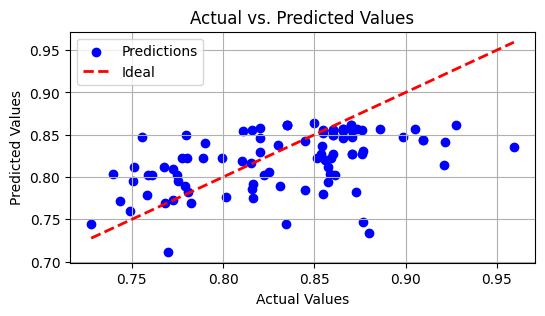

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the actual test data and predictions
plt.figure(figsize=(6,3))
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

#RMSE MSE plot

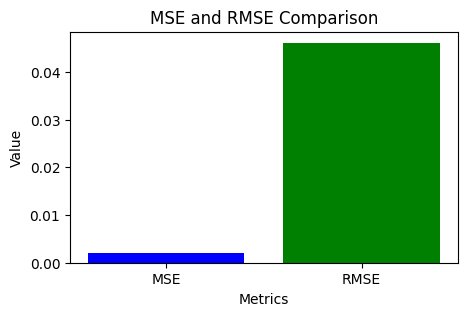

In [98]:
# Create labels and values for the bar plot
metrics = ['MSE', 'RMSE']
values = [mse, rmse]

# Plotting the bar plot
plt.figure(figsize=(5,3))
plt.bar(metrics, values, color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('MSE and RMSE Comparison')
plt.show()